# Project 5: K-Means Clustering

Before we start, please put your name and CUID in following format

: Firstname LASTNAME, #00000000   //   e.g. Nianyi LI, #12345678

**Your Answer:**   
Jack CARSON, #53602298

# General Rules of the Project Submission

Python 3 and [Matplotlib](https://matplotlib.org/) will be used throughout the semseter, so it is important to be familiar with them. It is strongly suggested to go through [Stanford CS231n](http://cs231n.github.io/python-numpy-tutorial/) and [CS228](https://github.com/kuleshov/cs228-material/blob/master/tutorials/python/cs228-python-tutorial.ipynb) for more detailed Python and numpy tutorials if you haven't had used Python before. 

In some cells and files you will see code blocks that look like this:

```python
##############################################################################
#                    TODO: Write the equation for a line                     #
##############################################################################
pass
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################
```

You should replace the `pass` statement with your own code and leave the blocks intact, like this:

```python
##############################################################################
#                    TODO: Write the equation for a line                     #
##############################################################################
y = m * x + b
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################
```

When completing the notebook, please adhere to the following rules:
- Do not write or modify any code outside of code blocks
- Follow the instruction of the project description carefully
- Run all cells before submitting. <span style="color:red">**You will only get credit for code that has been run!**.</span>

The last point is extremely important and bears repeating:

### We will not re-run your notebook -- <span style="color:red">you will only get credit for cells that have been run</span>

### File name
Your Python program should be named **yourlastname_yourfirstname_P5.ipynb**, then zip it and upload to Canvas

# Project Description

For this project you will implement a **K-means** clustering algorithm.


## Data File

Two text files with the data is available on Canvas: a data file and a centroids file. You need to write a code to read data from the two files. 

The **data file** will be formatted with the first line containing m and n, tab separated, where m is the number of lines of data and n is the number of features (for this assignment n will be 2 but assume we still put it into the file.)

Each line will contain two real values (feature $x_1$ and feature $x_2$), tab separated. Such as the following:
```

4	2
6.3	6.0
6.7	5.8
5.7	4.1
5.6	3.9
```
The **centroid file** containing two initial centroids, formatted with the number of centroids on the first line and the coordinates of each centroid on the following lines, one centroid per line, tab separated. Such as:
```
2
4 4
6 6
```

You **can** use packages, such as **panda**, to load the data.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
##############################################################################
#         TODO: Write the code for reading data from files                    #
##############################################################################

centroids = pd.read_csv('P5_Centroids.txt', sep='\t', header=None, skiprows=1)
data_points = pd.read_csv('P5_Data.txt', sep='\t', header=None, skiprows=1)

##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Next, you need to print out a plot of the data to the screen, including the two initial centroids (color coded) like the following figure:

<div>
<img src="https://nianyil.people.clemson.edu/CPSC_4430/P5_1.jpg" width="400"/>
</div>

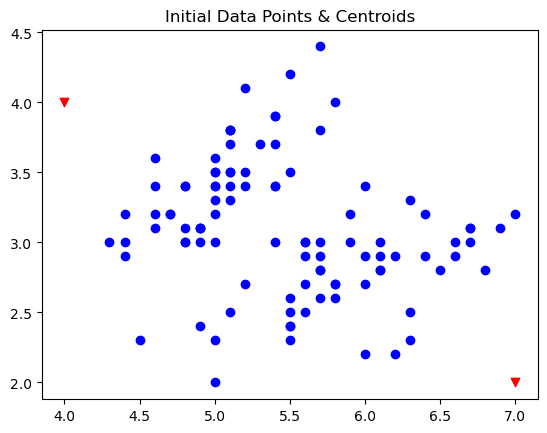

In [3]:
plt.title('Initial Data Points & Centroids')
plt.scatter(data_points[0], data_points[1], c='b', label='data points')
plt.scatter(centroids[0], centroids[1], c='r', marker='v', label='centroids')

## K-means Clustering

Implement K-means (**K=2**) to cluster the data into two groups.

In [4]:
##############################################################################
#                TODO: Implement the K-means clustering                      #
##############################################################################

centroids = centroids.to_numpy()
data_points = data_points.to_numpy()

from scipy.spatial.distance import cdist
def k_means(centroids, data_points, iterations=100):
    J = []
    for _ in range(iterations): # Run for iterations
        
        distances = cdist(data_points, centroids) # Get distances
        cluster_assignments = np.argmin(distances, axis=1) # Assign data points to clusters shortest distance away

        for i in range(centroids.shape[0]): # Update centroids
            centroids[i] = np.mean(data_points[cluster_assignments == i], axis=0)
        
        loss = np.sum(np.min(distances, axis=1)) # Calculate loss
        J.append(loss)

    return centroids, cluster_assignments, J # Return final centroids and cluster assignments

##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Once the algorithm converged, print out a plot of the cluster data with each cluster color coded along with the final centroids like the following:
<div>
<img src="https://nianyil.people.clemson.edu/CPSC_4430/P5_2.jpg" width="400"/>
</div>

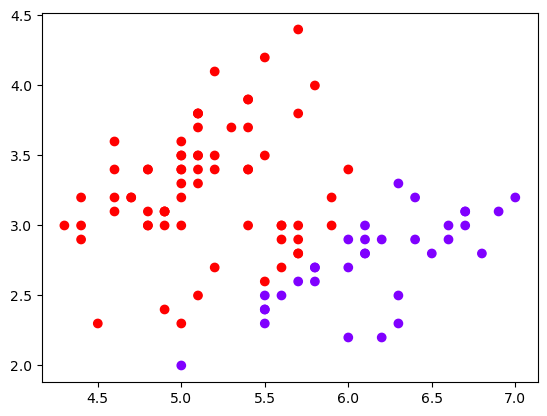

In [5]:
##############################################################################
#                TODO: Plot the clustering result                           #
##############################################################################

new_centroids, cluster_assignments, loss = k_means(centroids, data_points)

plt.scatter(data_points[:, 0], data_points[:, 1], c=cluster_assignments, cmap='rainbow')

##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Next, print out the coordinates of the final centroids.

In [6]:
##############################################################################
#       TODO: print out the final centroids' coordinates                     #
##############################################################################

for i in range(new_centroids.shape[0]):
    print(f'Centroid {i+1}: {new_centroids[i]}')

##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Centroid 1: [6 2]
Centroid 2: [5 3]


## Model Evaluation

Compute and **print out the overall error** (J function presented in the course slides) for the entire data set.


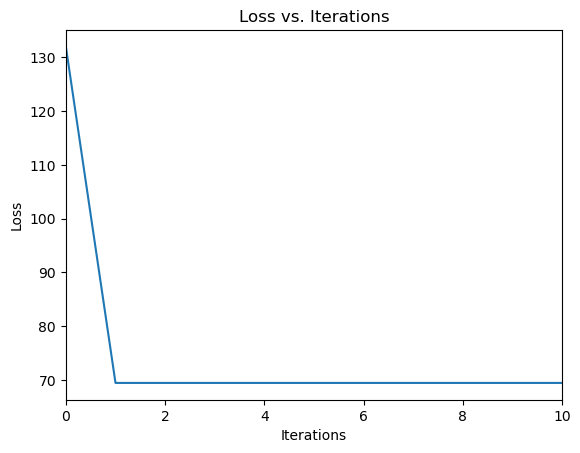

In [7]:
##############################################################################
#                           TODO: Model Evaluation                           #
##############################################################################

plt.title('Loss vs. Iterations')
plt.plot(loss)
plt.xlim(0, 10)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

In [8]:
# The model converges after 2 iterations, adding more iterations does not improve the clusters

# However, changing the... 

# initial centroids
# number of clusters
# number of data points 

# are some hyperparameters that can be tuned to change the loss over iterations for the model